In [1]:
# Load the pickle file resulted from analyzeGenerateShapValues
import pickle
#output_file = "/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/DeepTopic/activity_lr_00001/deepExpVal_Topic_1_2_top500.pkl"
output_file = "/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/DeepTopic/activity_lr_00001/deepExpVal_Topic_1_2.pkl"
f = open(output_file, "rb")
tasks = pickle.load(f)
task_to_scores = pickle.load(f)
task_to_hyp_scores = pickle.load(f)
onehot_data = pickle.load(f)
f.close()
#import pickle
#from modisco.visualization import viz_sequence
#viz_sequence.plot_weights(task_to_scores[tasks[0]][0], subticks_frequency=20)
#viz_sequence.plot_weights(task_to_hyp_scores[tasks[0]][0], subticks_frequency=20)
#viz_sequence.plot_weights(onehot_data[0], subticks_frequency=20)

In [3]:
# LOAD TFMODISCO OUTPUT

from __future__ import print_function, division
#%matplotlib inline
try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import h5py
import modisco.util
from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/DeepTopic/activity_lr_00001/all_regions_tfmodisco_default_meme.hdf5","r")

Metaclusters heatmap


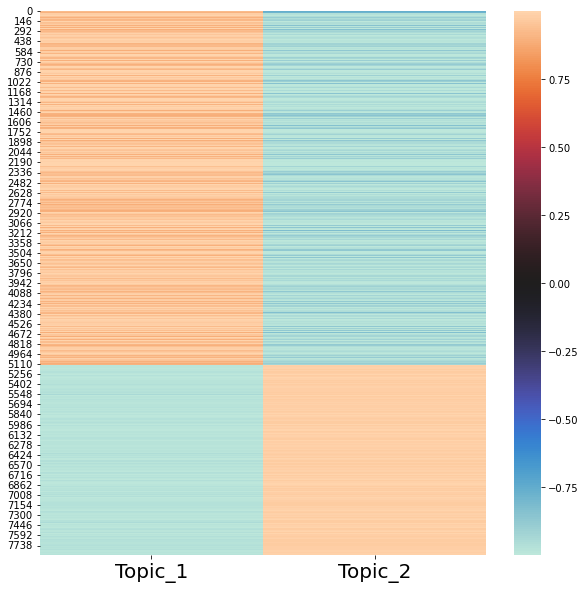

In [4]:
# PLOT METACLUSTER HEATMAP
print("Metaclusters heatmap")
import numpy as np
import seaborn as sns
plt.figure(figsize=(10,10))
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns_plot = sns.heatmap(activity_patterns, center=0)
fig = sns_plot.get_figure()
plt.xticks([0.5,1.5],tasks,fontsize=20)
plt.show()

In [10]:
import os
os.chdir("/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/DeepTopic")
import utils
from utils import plot_a, plot_c, plot_g, plot_t, plot_weights_given_ax
default_colors = {0:'green', 1:'blue', 2:'orange', 3:'red'}
default_plot_funcs = {0:plot_a, 1:plot_c, 2:plot_g, 3:plot_t}

def plot_weights_noshow(array,
                 figsize=(20,2),
                 height_padding_factor=0.2,
                 length_padding=1.0,
                 subticks_frequency=1.0,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs,
                 highlight={}):
    fig = plt.figure(figsize=figsize) 
    ax = fig.add_subplot(111) 
    y = plot_weights_given_ax(ax=ax, array=array,
        height_padding_factor=height_padding_factor,
        length_padding=length_padding,
        subticks_frequency=subticks_frequency,
        colors=colors,
        plot_funcs=plot_funcs,
        highlight=highlight)
    return y,fig

def plot_weights_noshow2(array, fig, n, title='',
                 figsize=(20,2),
                 height_padding_factor=0.2,
                 length_padding=1.0,
                 subticks_frequency=20,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs,
                 highlight={}):
    ax = fig.add_subplot(n) 
    ax.set_title(title)
    y = plot_weights_given_ax(ax=ax, array=array,
        height_padding_factor=height_padding_factor,
        length_padding=length_padding,
        subticks_frequency=subticks_frequency,
        colors=colors,
        plot_funcs=plot_funcs,
        highlight=highlight)
    return fig

def plot_weights_noshow2_ylab(array, fig, n, title='', ylab='',
                              figsize=(20,2),
                 height_padding_factor=0.2,
                 length_padding=1.0,
                 subticks_frequency=20,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs,
                 highlight={}):
    #fig = plt.figure(figsize=figsize) 
    ax = fig.add_subplot(n) 
    ax.set_title(title)
    ax.set_ylabel(ylab)
    y = plot_weights_given_ax(ax=ax, array=array,
        height_padding_factor=height_padding_factor,
        length_padding=length_padding,
        subticks_frequency=subticks_frequency,
        colors=colors,
        plot_funcs=plot_funcs,
        highlight=highlight)
    return fig

def plot_weights_noshow2_ylab_2(array, fig, n,n1,n2, title='', ylab='',
                              figsize=(20,2),
                 height_padding_factor=0.2,
                 length_padding=1.0,
                 subticks_frequency=20,
                 colors=default_colors,
                 plot_funcs=default_plot_funcs,
                 highlight={}):
    #fig = plt.figure(figsize=figsize) 
    ax = fig.add_subplot(n,n1,n2) 
    ax.set_title(title)
    ax.set_ylabel(ylab)
    y = plot_weights_given_ax(ax=ax, array=array,
        height_padding_factor=height_padding_factor,
        length_padding=length_padding,
        subticks_frequency=subticks_frequency,
        colors=colors,
        plot_funcs=plot_funcs,
        highlight=highlight)
    return fig,ax

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


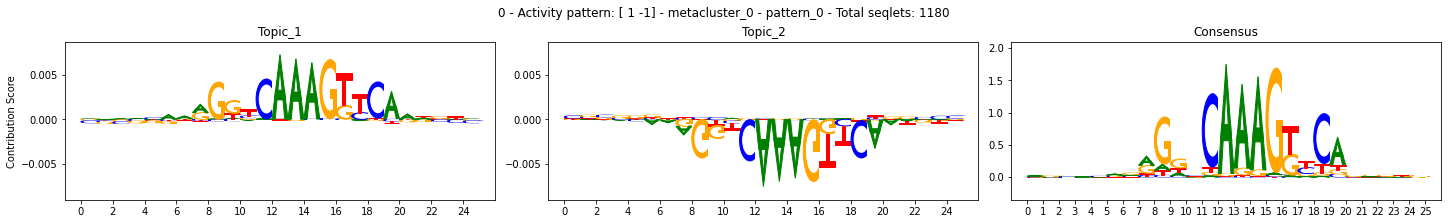

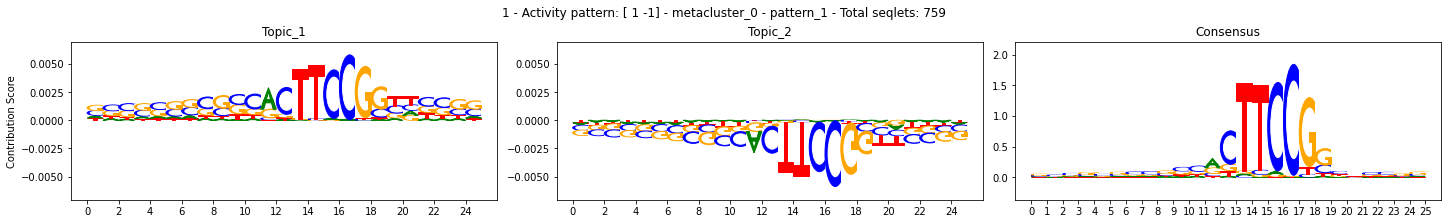

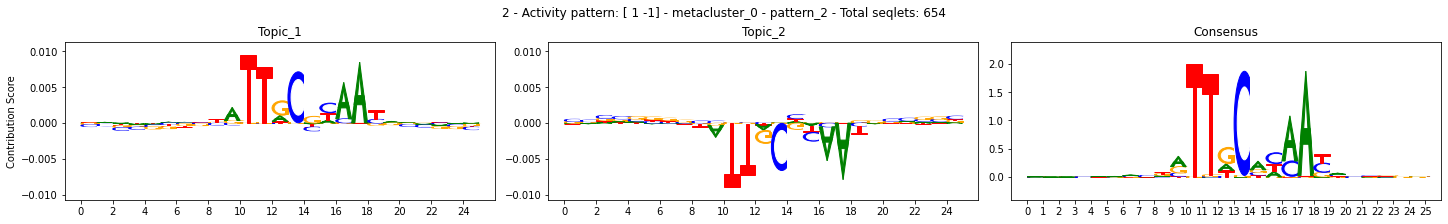

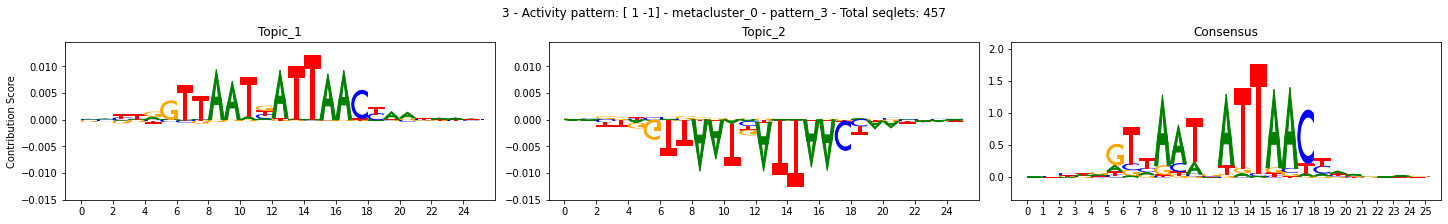

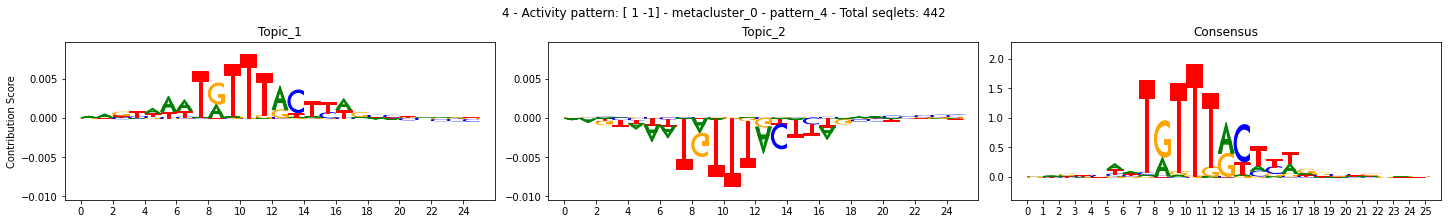

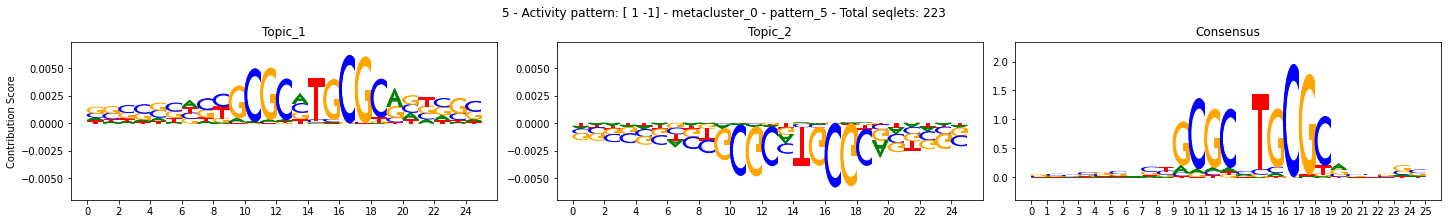

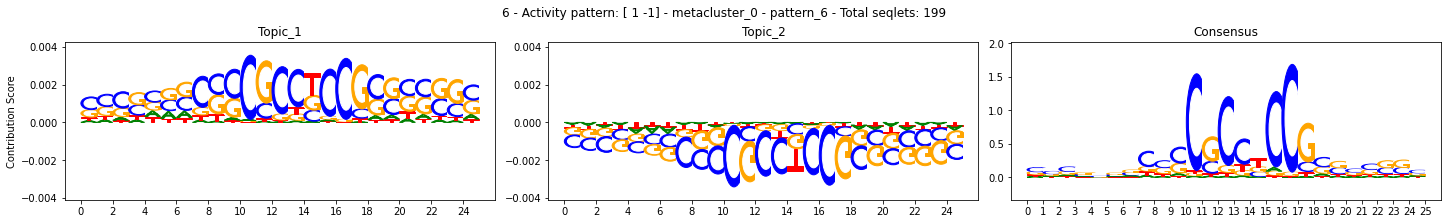

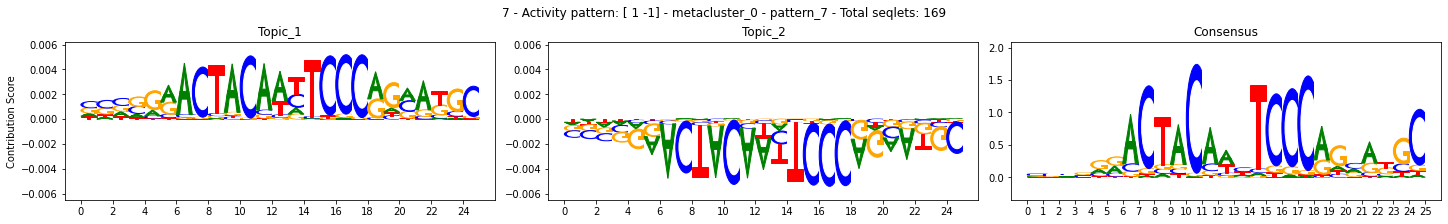

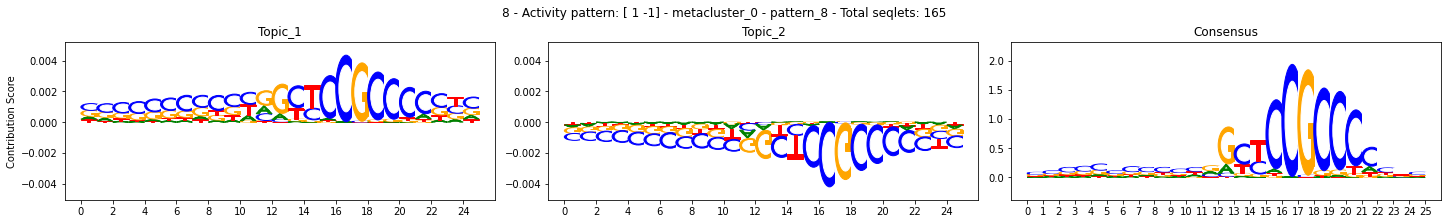

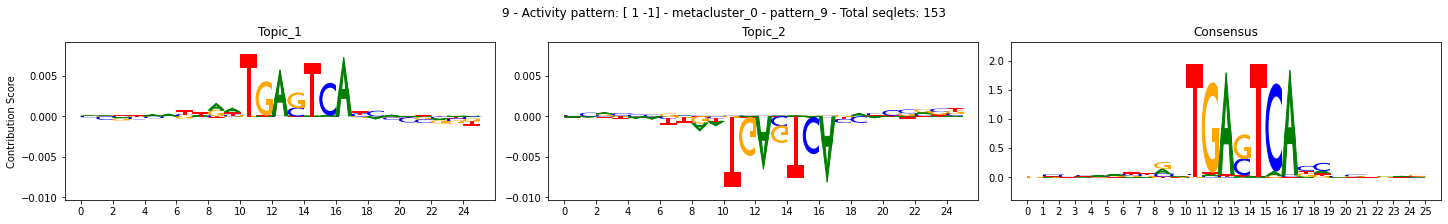

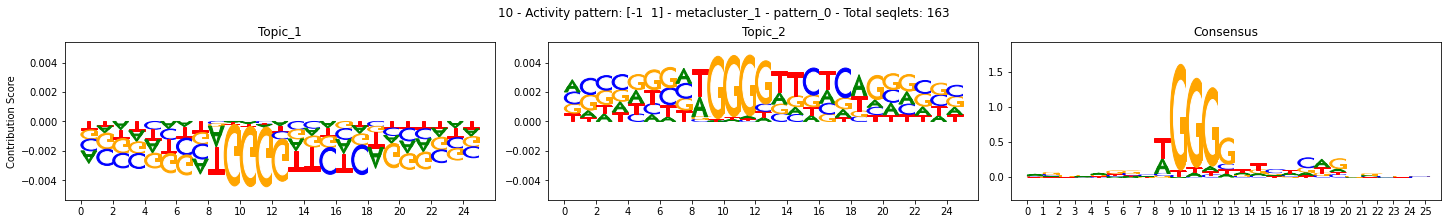

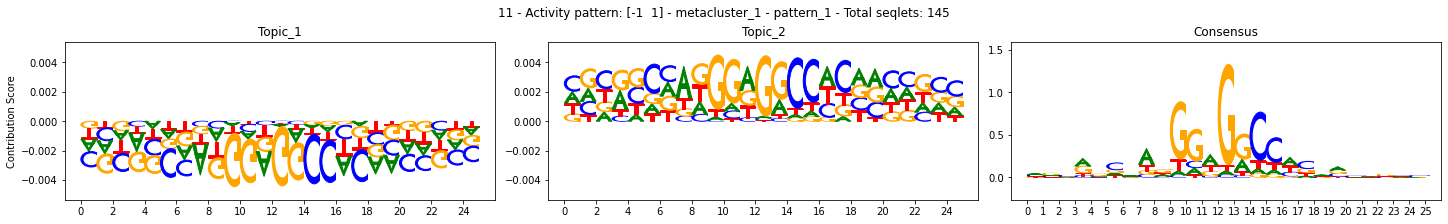

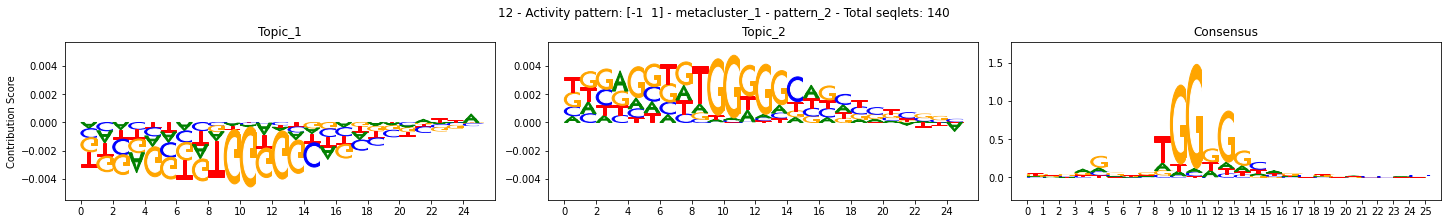

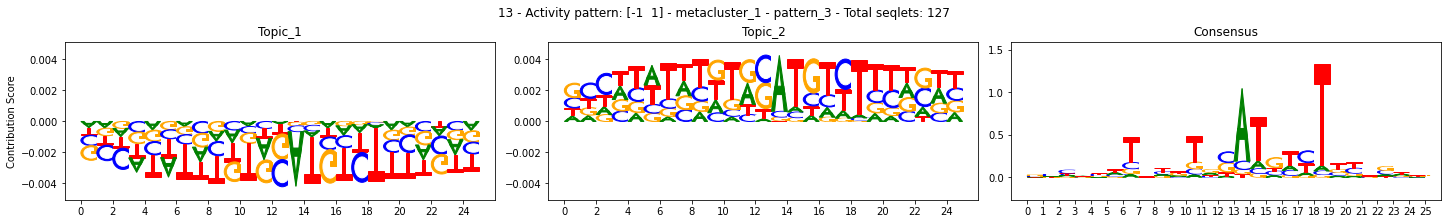

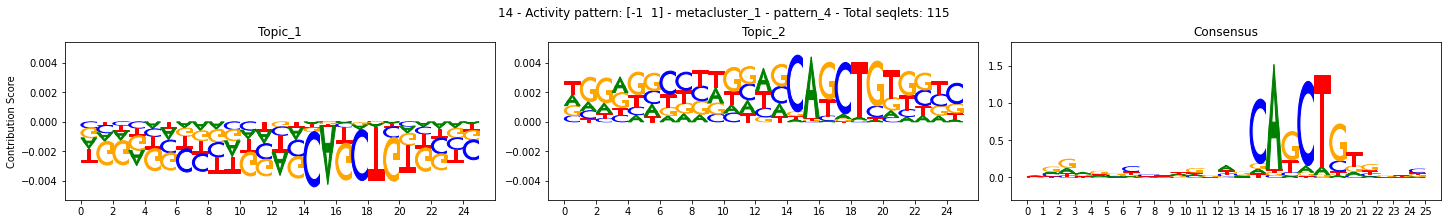

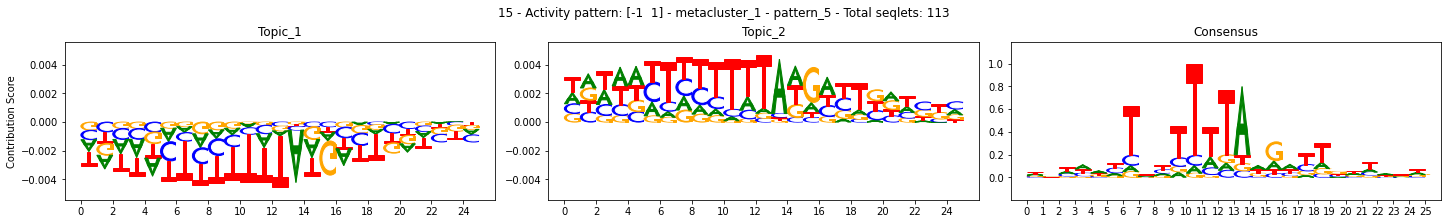

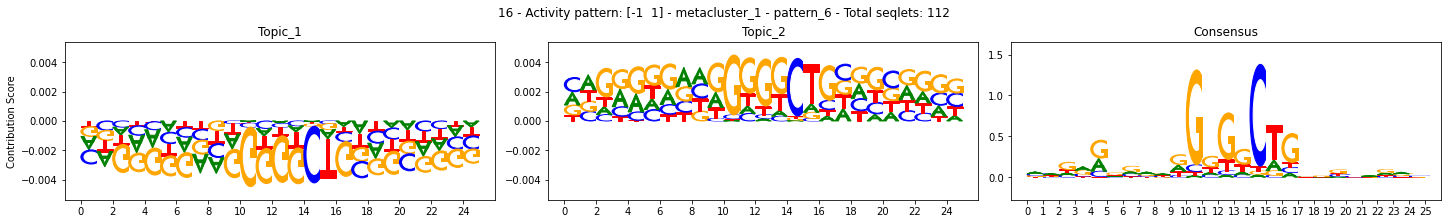

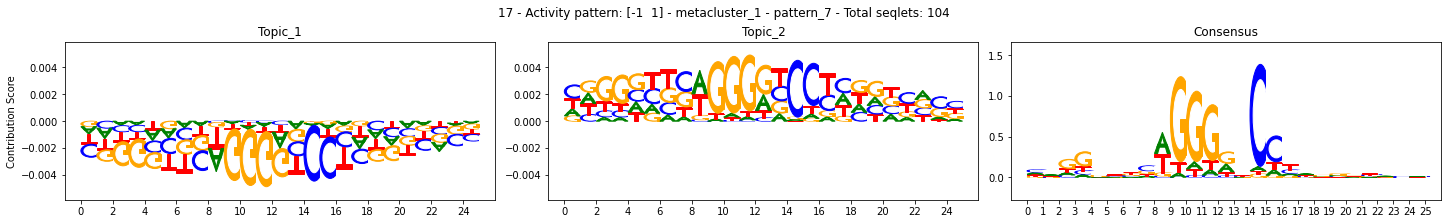

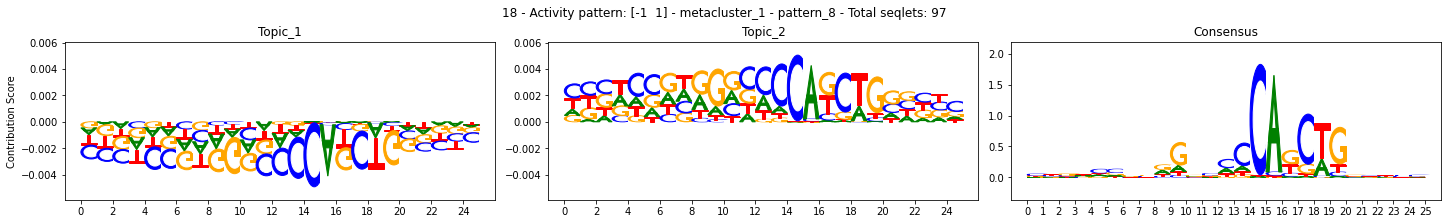

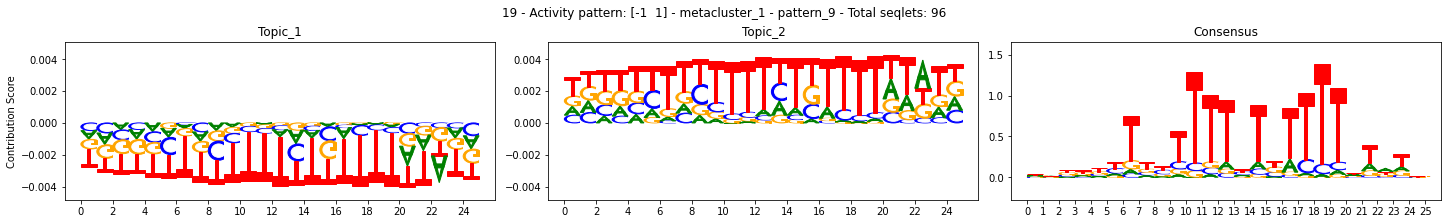

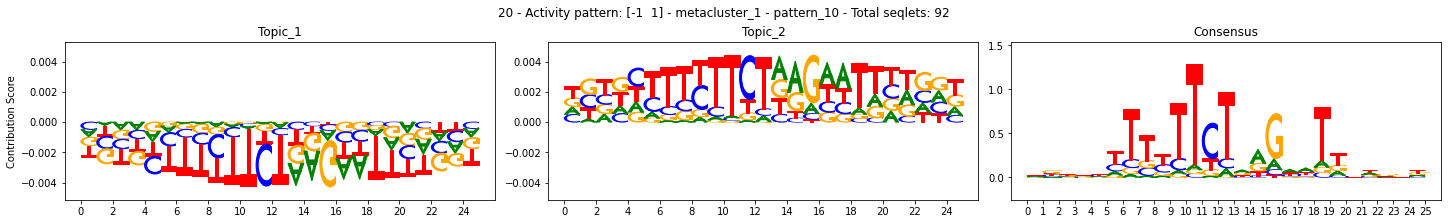

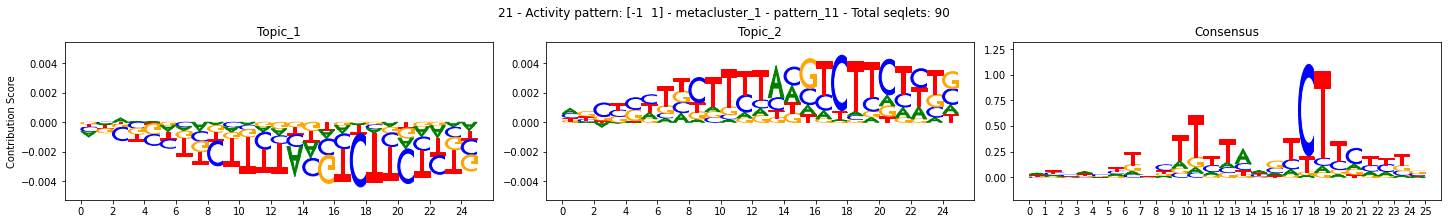

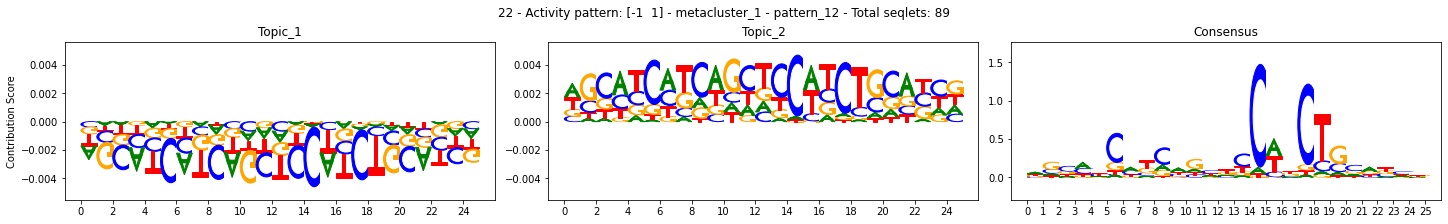

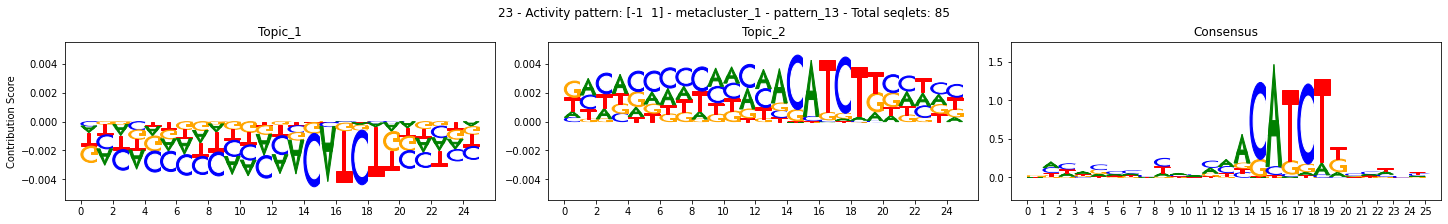

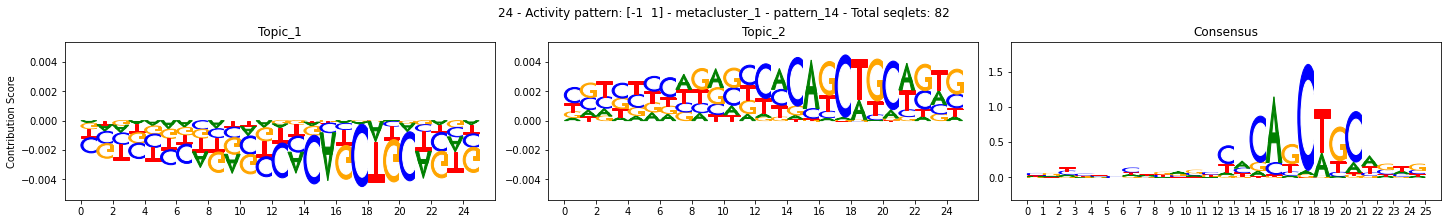

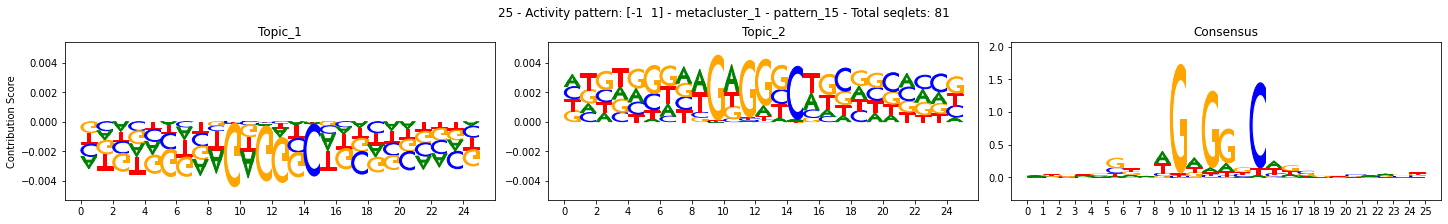

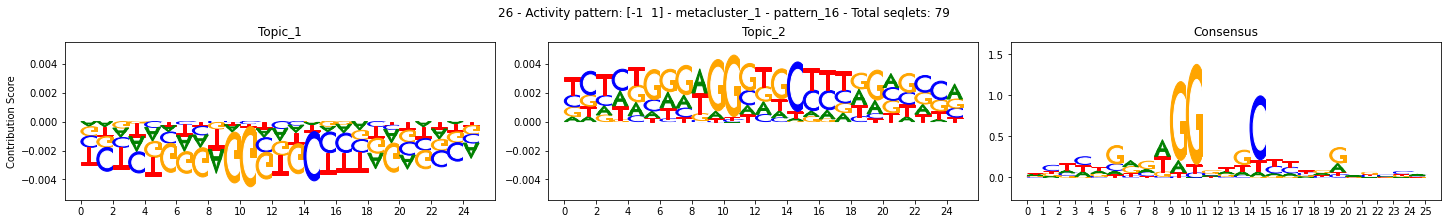

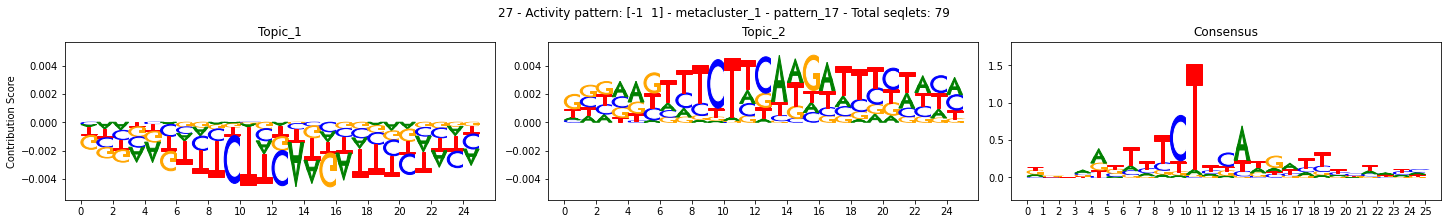

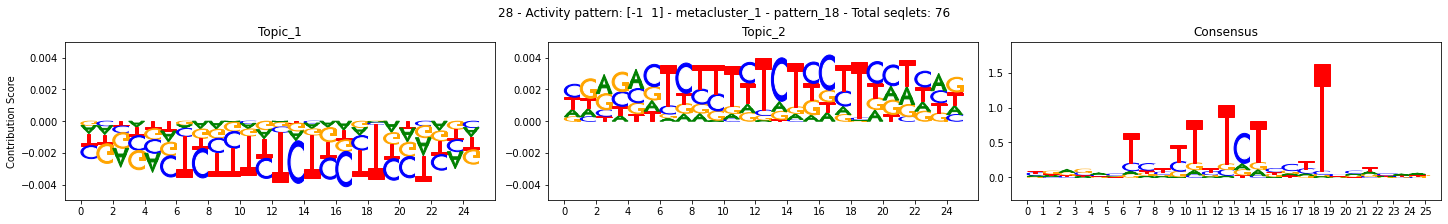

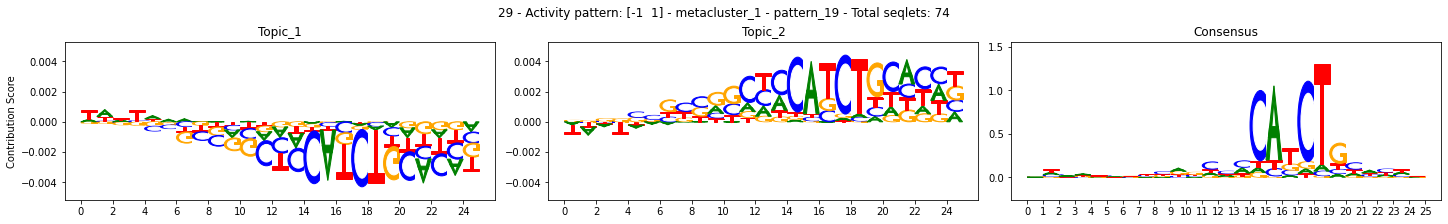

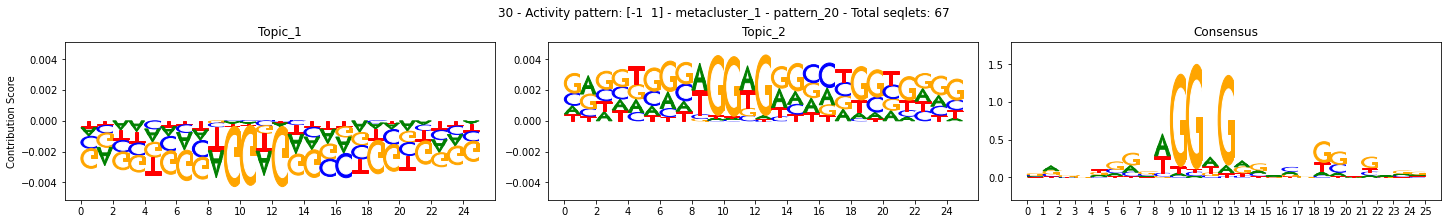

In [32]:
# PLOT EACH PATTERN
import matplotlib
all_patterns = []
metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]
x = 0
save='/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/DeepTopic/activity_lr_00001/tf_modisco_meme_table.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(save)
for metacluster_name in metacluster_names:
    #print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    #print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        #print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        #print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        fig, ax = plt.subplots(ncols=len(tasks)+1, nrows=1, constrained_layout=True, figsize=(20,3))
        [axi.set_axis_off() for axi in ax.ravel()[0:len(tasks)]]
        for i in range(len(tasks)):
            if i == 0:
                _, ax[i] = plot_weights_noshow2_ylab_2(pattern[tasks[i]+"_contrib_scores"]["fwd"],fig,1,len(tasks)+1,i+1,title=tasks[i], subticks_frequency=2,ylab="Contribution Score")
            else:                                                                                                         
                _, ax[i] = plot_weights_noshow2_ylab_2(pattern[tasks[i]+"_contrib_scores"]["fwd"],fig,1,len(tasks)+1,i+1,title=tasks[i], subticks_frequency=2,ylab="")
        for i in range(len(tasks)):
            ax[i].set_ylim([np.min([ax[j].get_ylim()[0] for j in range(len(tasks))]) , np.max([ax[j].get_ylim()[1] for j in  range(len(tasks))])])

        ax = plt.subplot(1,len(tasks)+1, len(tasks)+1)
        viz_sequence.plot_weights_given_ax(ax,viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]), background=background))
        ax.set_title('Consensus')
        fig.suptitle(str(x) + ' - ' + "Activity pattern: "+ str(metacluster_grp["activity_pattern"][:]) + ' - ' + metacluster_name + ' - ' + pattern_name + ' - ' + "Total seqlets: " + str(len(pattern["seqlets_and_alnmts"]["seqlets"])))
        #fig.tight_layout()
        pdf.savefig(fig, bbox_inches="tight")  
        plt.show()
        x += 1
#hdf5_results.close()
pdf.close()

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


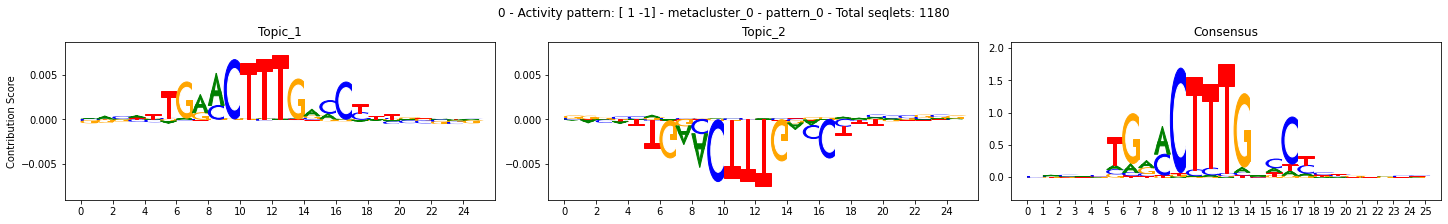

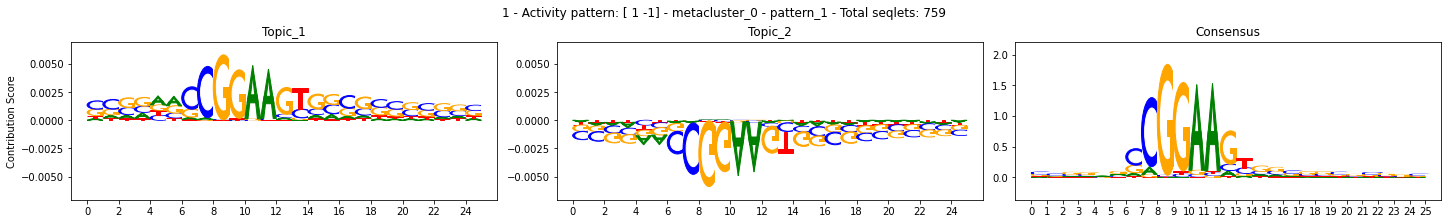

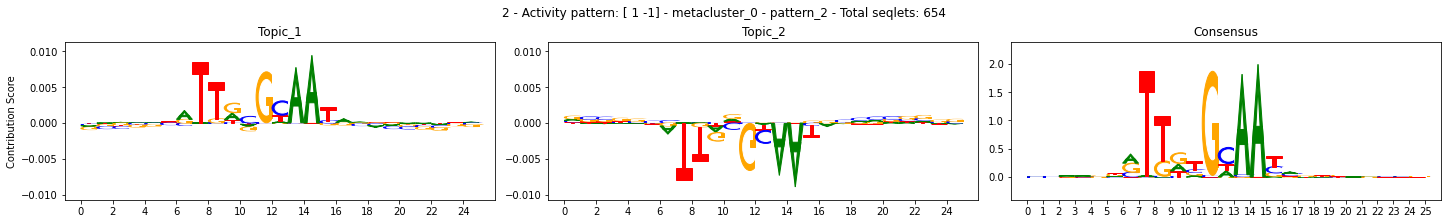

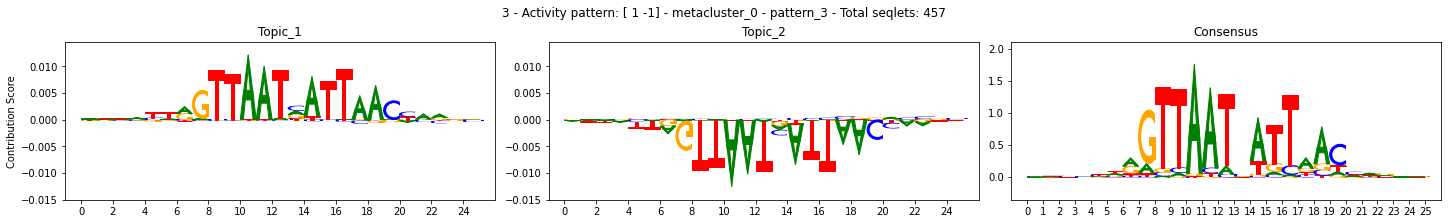

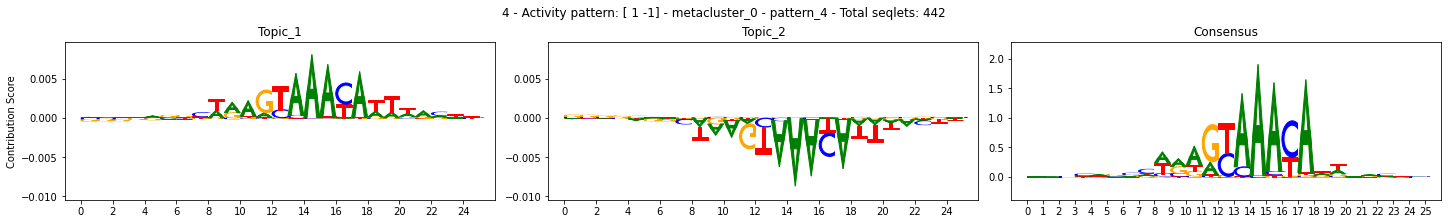

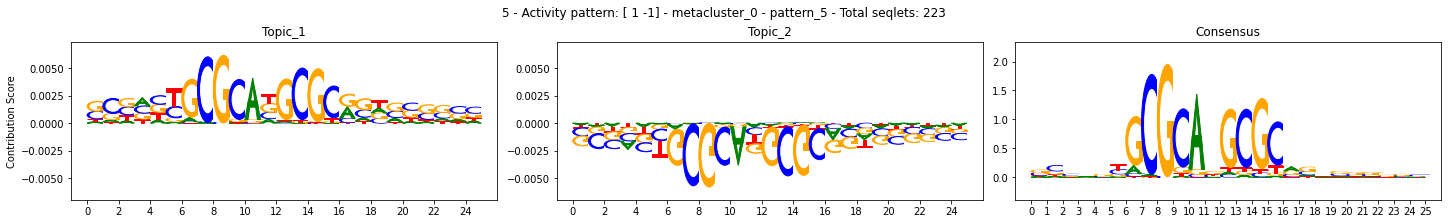

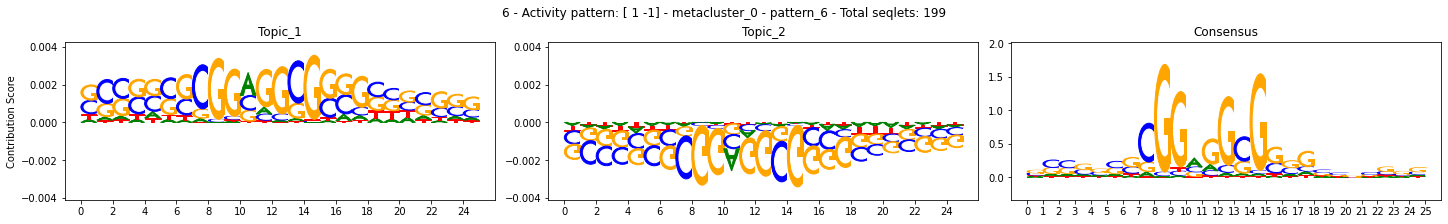

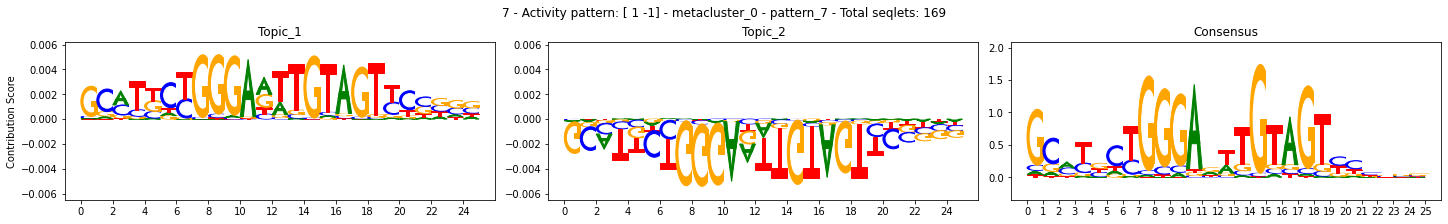

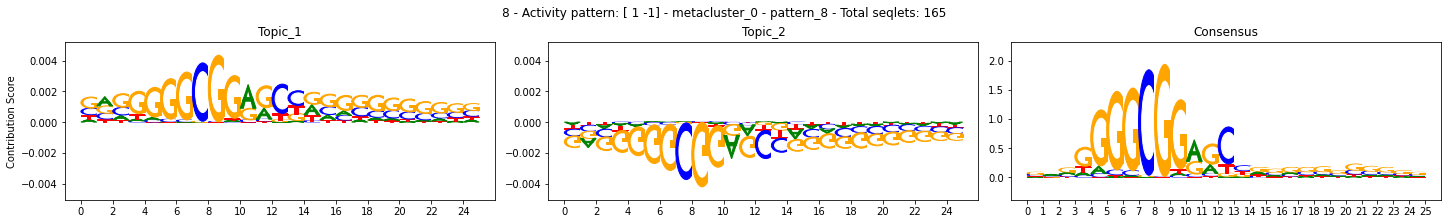

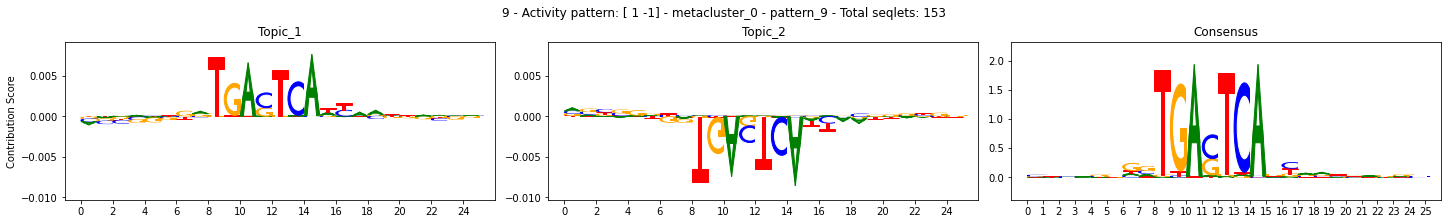

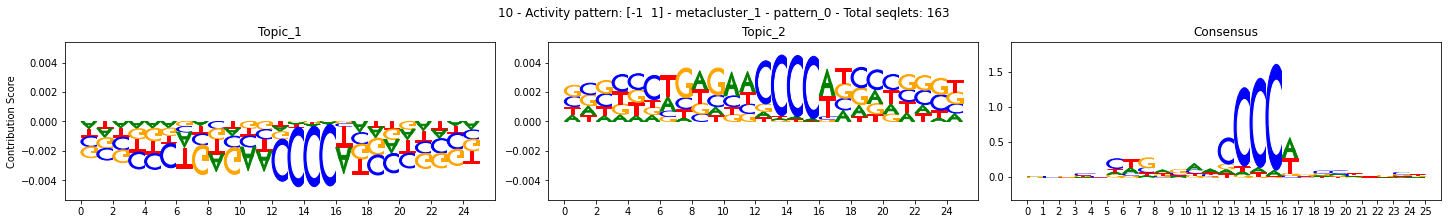

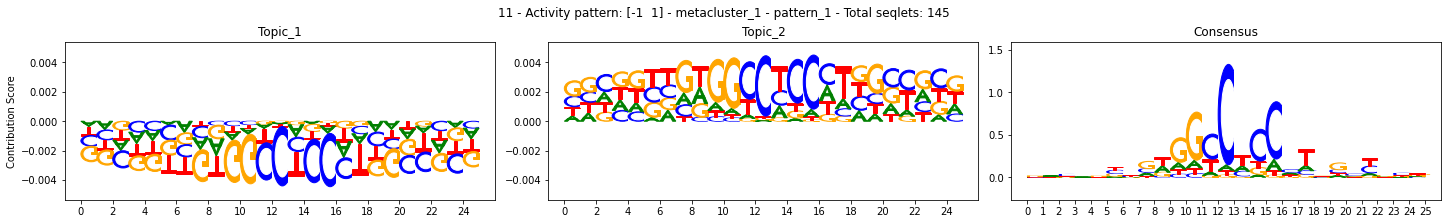

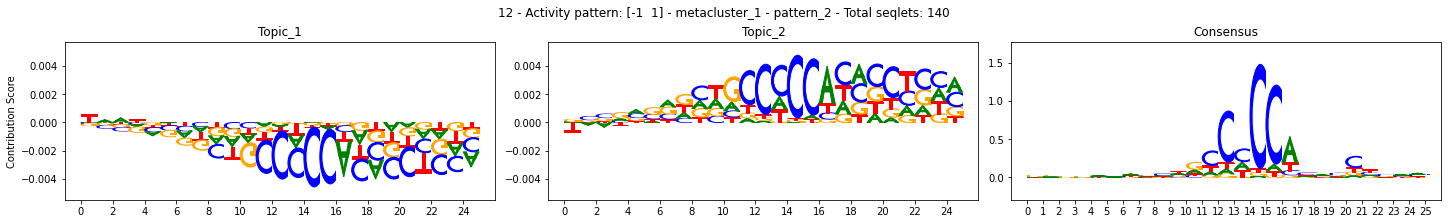

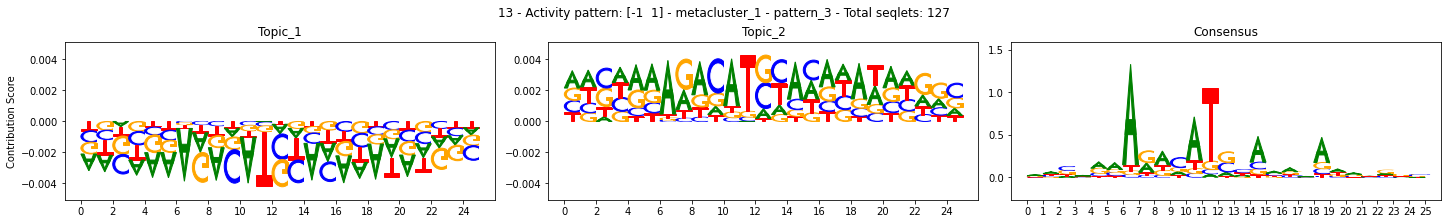

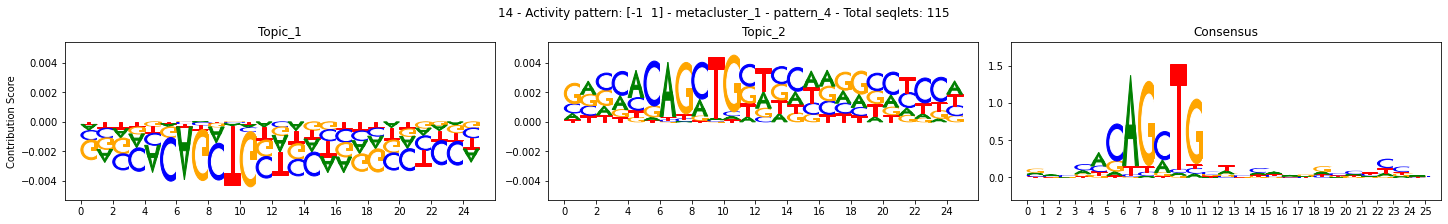

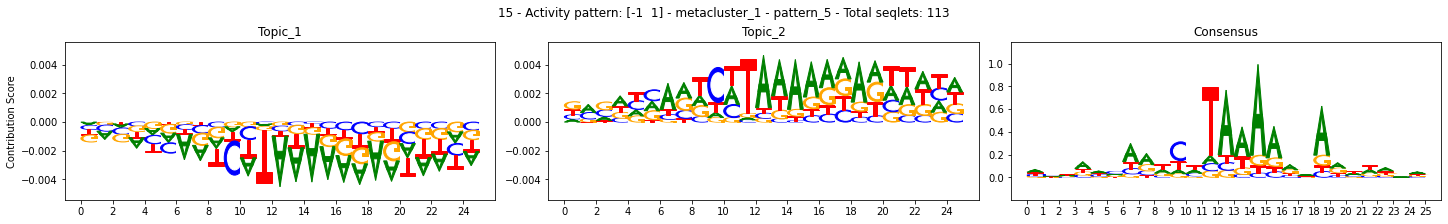

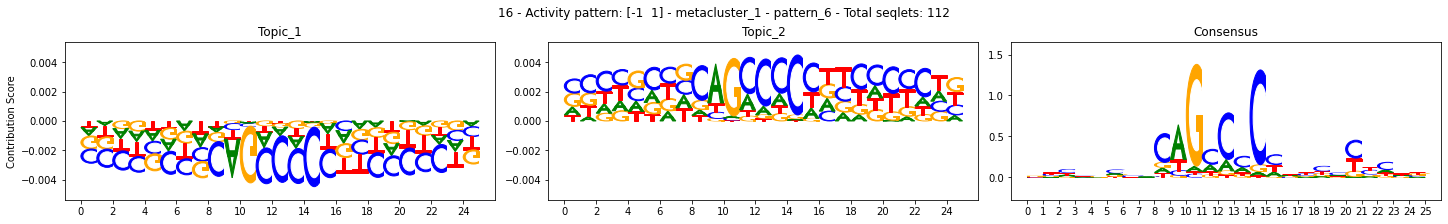

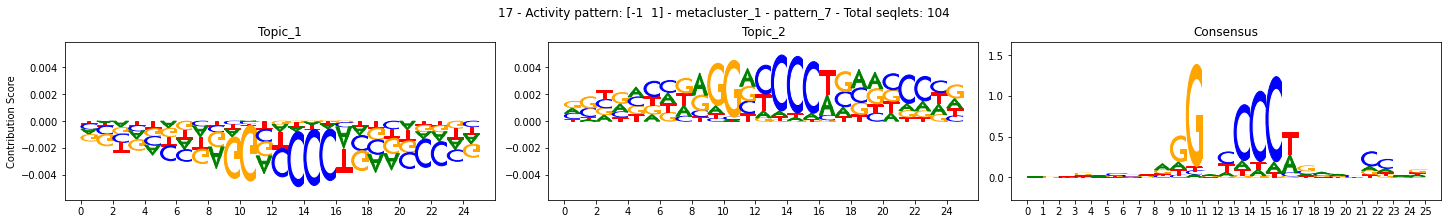

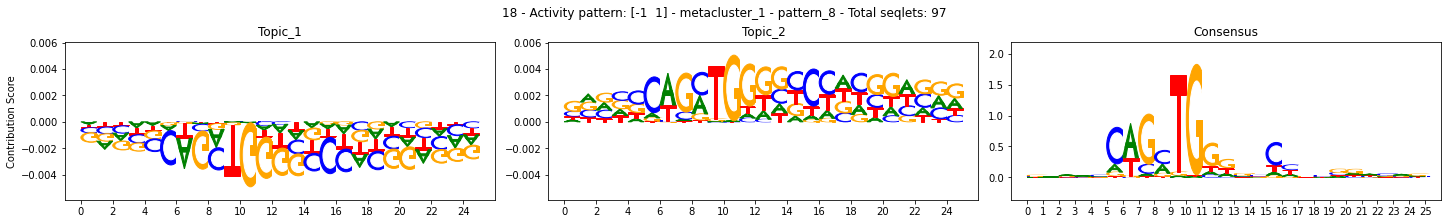

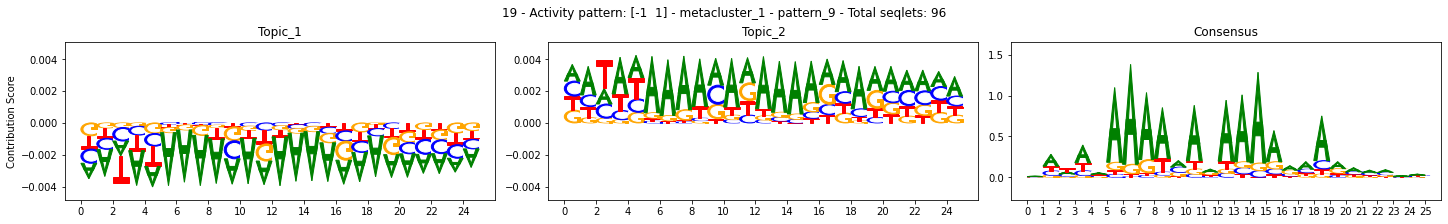

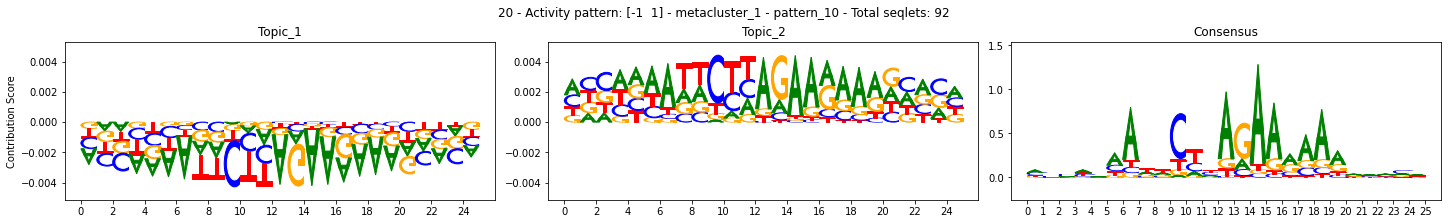

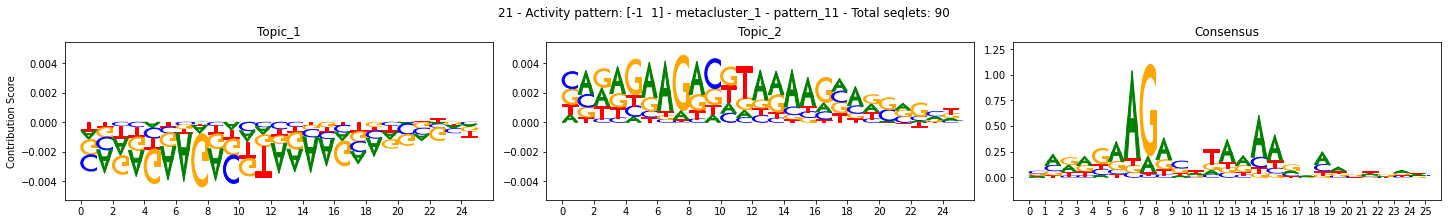

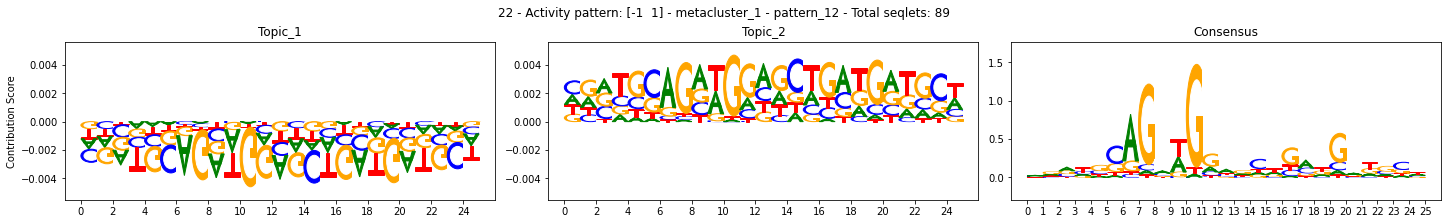

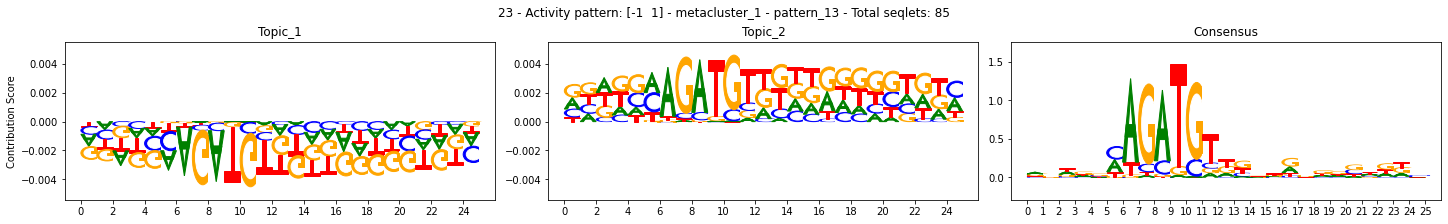

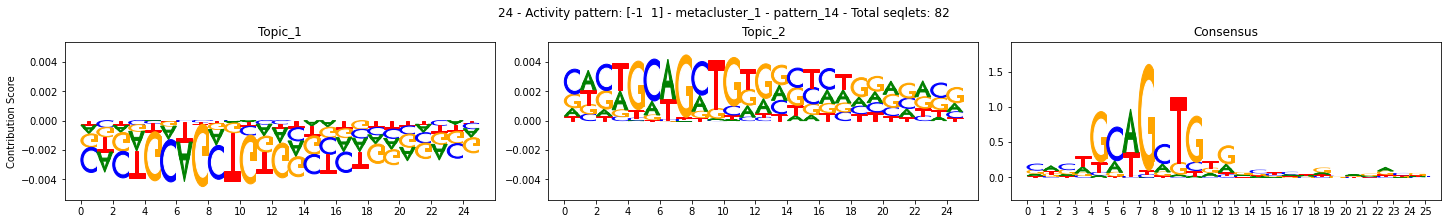

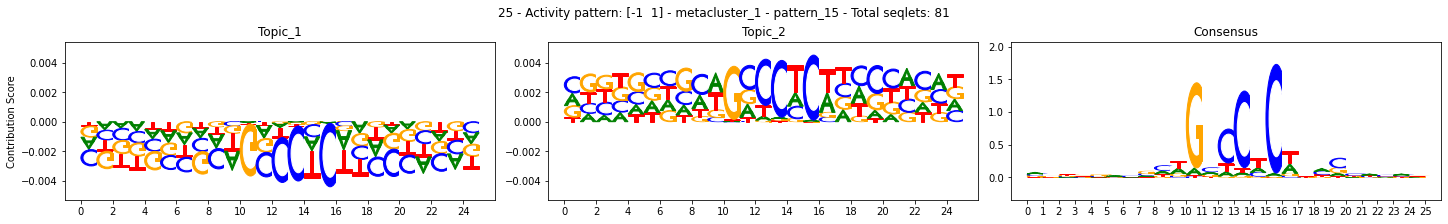

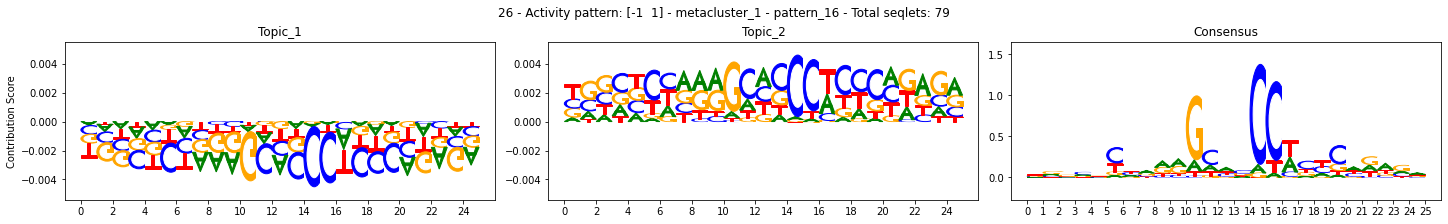

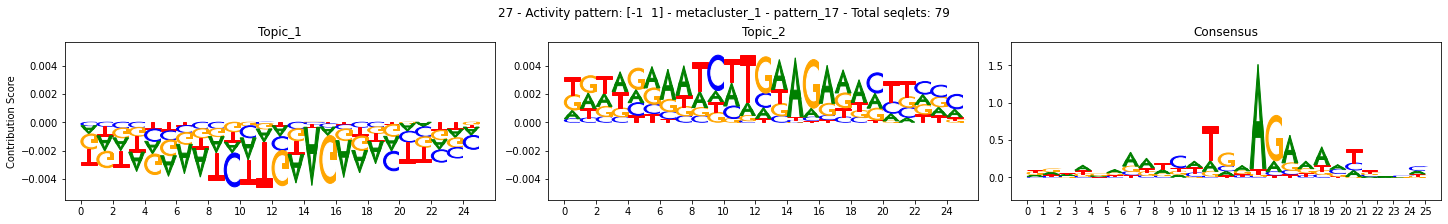

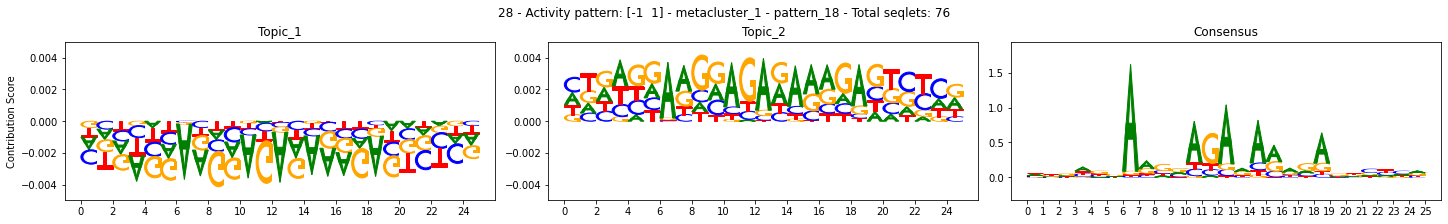

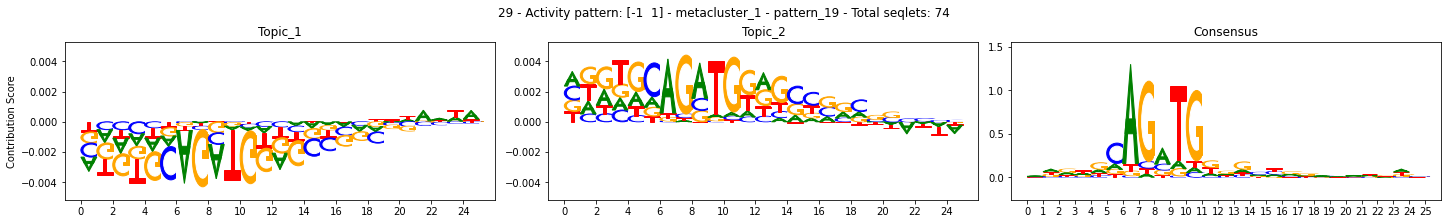

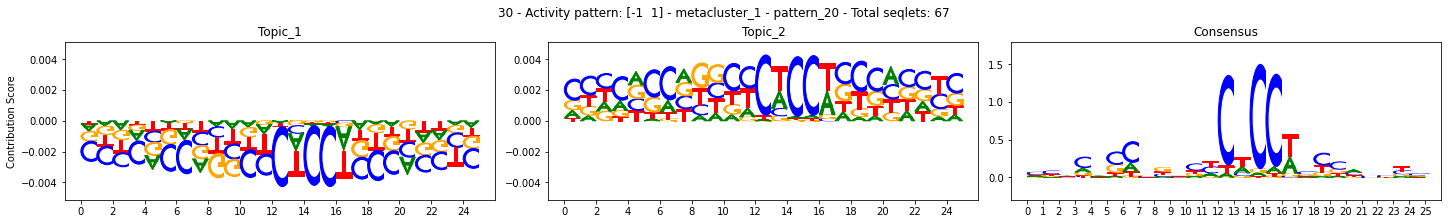

In [34]:
# PLOT EACH PATTERN
import matplotlib
all_patterns = []
metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]
x = 0
save='/staging/leuven/stg_00002/lcb/cbravo/Liver/Multiome/DeepTopic/activity_lr_00001/tf_modisco_meme_table_rev.pdf'
pdf = matplotlib.backends.backend_pdf.PdfPages(save)
for metacluster_name in metacluster_names:
    #print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    #print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        #print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        #print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.27, 0.23, 0.23, 0.27])
        fig, ax = plt.subplots(ncols=len(tasks)+1, nrows=1, constrained_layout=True, figsize=(20,3))
        [axi.set_axis_off() for axi in ax.ravel()[0:len(tasks)]]
        for i in range(len(tasks)):
            if i == 0:
                _, ax[i] = plot_weights_noshow2_ylab_2(pattern[tasks[i]+"_contrib_scores"]["rev"],fig,1,len(tasks)+1,i+1,title=tasks[i], subticks_frequency=2,ylab="Contribution Score")
            else:                                                                                                         
                _, ax[i] = plot_weights_noshow2_ylab_2(pattern[tasks[i]+"_contrib_scores"]["rev"],fig,1,len(tasks)+1,i+1,title=tasks[i], subticks_frequency=2,ylab="")
        for i in range(len(tasks)):
            ax[i].set_ylim([np.min([ax[j].get_ylim()[0] for j in range(len(tasks))]) , np.max([ax[j].get_ylim()[1] for j in  range(len(tasks))])])

        ax = plt.subplot(1,len(tasks)+1, len(tasks)+1)
        viz_sequence.plot_weights_given_ax(ax,viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]), background=background))
        ax.set_title('Consensus')
        fig.suptitle(str(x) + ' - ' + "Activity pattern: "+ str(metacluster_grp["activity_pattern"][:]) + ' - ' + metacluster_name + ' - ' + pattern_name + ' - ' + "Total seqlets: " + str(len(pattern["seqlets_and_alnmts"]["seqlets"])))
        #fig.tight_layout()
        pdf.savefig(fig, bbox_inches="tight")  
        plt.show()
        x += 1
pdf.close()
#hdf5_results.close()